
# Titanic Data Analysis and Machine Learning Project

This project focuses on analyzing the Titanic dataset and applying machine learning models to predict survival outcomes. By leveraging data preprocessing, exploratory data analysis (EDA), feature engineering, and model training techniques, we aim to uncover insights and create a robust predictive model.
# Dataset Description
The Titanic dataset is a well-known dataset provided by Kaggle. It contains information about the passengers aboard the Titanic, including demographics, ticket details, and survival status. The key columns in the dataset include:
* Survived: Target variable indicating whether a passenger survived (1) or not (0).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Sex: Gender of the passenger.
* Age: Age of the passenger.
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.
* Fare: Ticket fare paid by the passenger.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

This project will systematically explore the dataset, preprocess the data, handle missing values, detect outliers, and engineer features. Finally, we will use machine learning models to predict survival outcomes and evaluate their performance.


# Titanic Data Analysis and Machine Learning Project

This project focuses on analyzing the Titanic dataset and applying machine learning models to predict survival outcomes. By leveraging data preprocessing, exploratory data analysis (EDA), feature engineering, and model training techniques, we aim to uncover insights and create a robust predictive model.
# Dataset Description
The Titanic dataset is a well-known dataset provided by Kaggle. It contains information about the passengers aboard the Titanic, including demographics, ticket details, and survival status. The key columns in the dataset include:
* Survived: Target variable indicating whether a passenger survived (1) or not (0).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Sex: Gender of the passenger.
* Age: Age of the passenger.
* SibSp: Number of siblings/spouses aboard.
* Parch: Number of parents/children aboard.
* Fare: Ticket fare paid by the passenger.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

This project will systematically explore the dataset, preprocess the data, handle missing values, detect outliers, and engineer features. Finally, we will use machine learning models to predict survival outcomes and evaluate their performance.

In [1]:
!pwd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
print(pd.__version__)
!pip install matplotlib numpy seaborn
!pip install scipy
!pip install scikit-learn

# Load the original Titanic dataset
dataset_path = "Original Titanic Dataset.csv"  
data = pd.read_csv(dataset_path)

# Display the first few rows to confirm it's loaded correctly
print(data.head())



/Users/eddyyujinlee/Documents/TitanicProject/Code
2.2.3
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  

This cell provides an overview of the dataset using data.info() to check data types, column names, and missing values, and data.describe() to generate summary statistics for numerical features. This step is essential to identify issues like missing values and understand feature distributions, which guide data cleaning and preprocessing.

In [2]:
# Basic information about the dataset
print("\nDataset Information:")
data.info()

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.5

# Exploratory Data Analysis (EDA)

In [3]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


This cell visualizes the distributions of numerical features in the dataset using histograms. The **data.hist()** function plots the histograms, showing the spread of values for each numerical column like Age, Fare, and Parch. Proper spacing between plots is ensured using **plt.tight_layout().** This step helps identify feature distributions, potential outliers, and skewness, which are critical for preprocessing and model readiness.

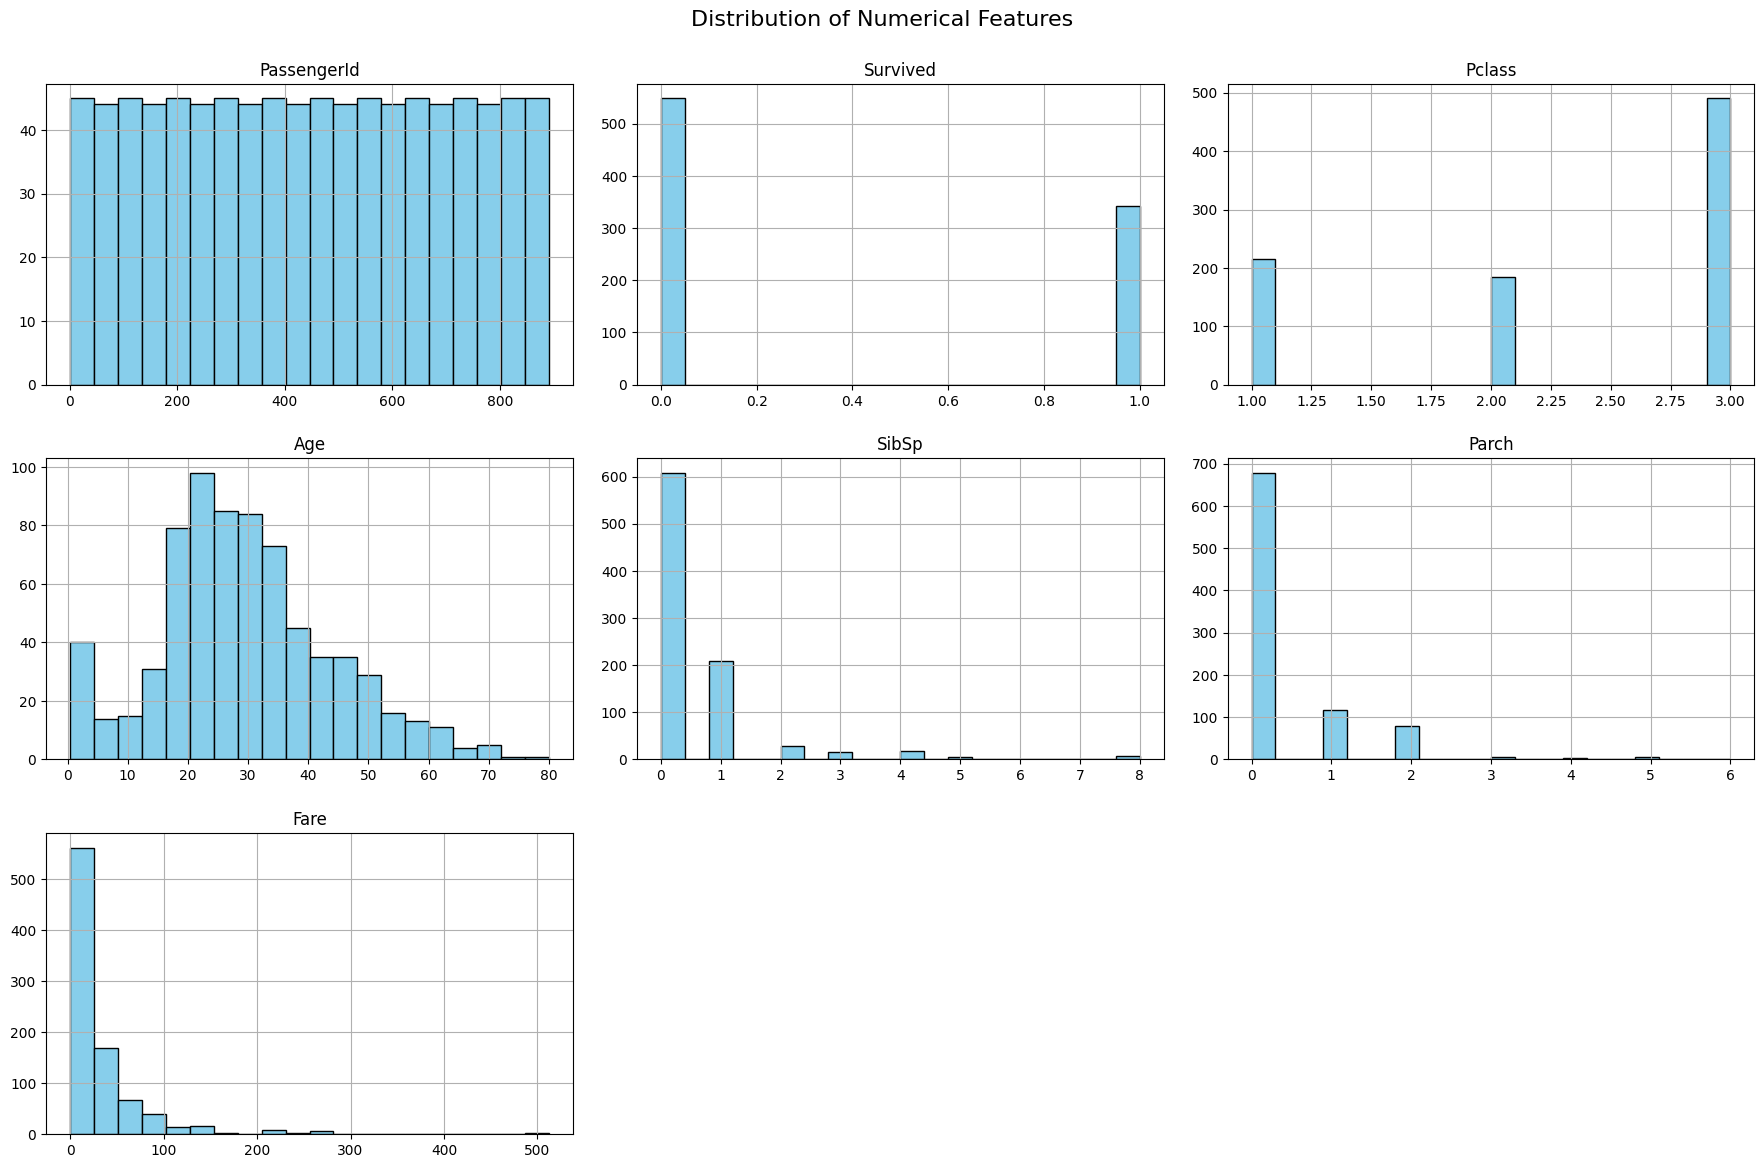

In [4]:

data.hist(bins=20, figsize=(18, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(pad=2.0)  # Adjust the spacing between subplots
plt.show()


This cell visualizes missing data in the dataset using a heatmap. The **sns.heatmap() function highlights missing values (NaN) in yellow**, making it easy to identify which features have gaps (Age, Cabin). Understanding missing data is crucial to determine appropriate handling strategies, such as imputation or removal, for ensuring data quality and consistency before analysis or modeling.

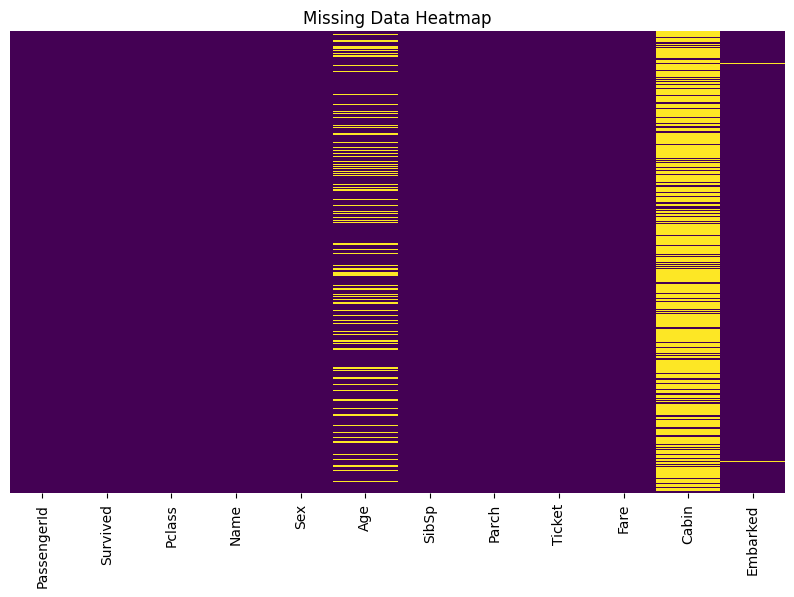

In [5]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


This cell identifies categorical columns in the dataset using **data.select_dtypes()** and counts the unique values for each column. The loop displays the number of unique values for variables like Sex, Embarked, and Cabin. This step is essential for **understanding the diversity of categories, detecting inconsistencies, and preparing for encoding or feature engineering.**

In [6]:
# Check unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Unique Values in Categorical Columns:
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


This cell visualizes the number of unique values in each categorical column using a bar chart. The **plt.bar()** function highlights the diversity of categories in features like Sex, Embarked, and Cabin. This helps identify columns with high cardinality, which may require special handling during preprocessing, such as grouping rare categories or encoding.


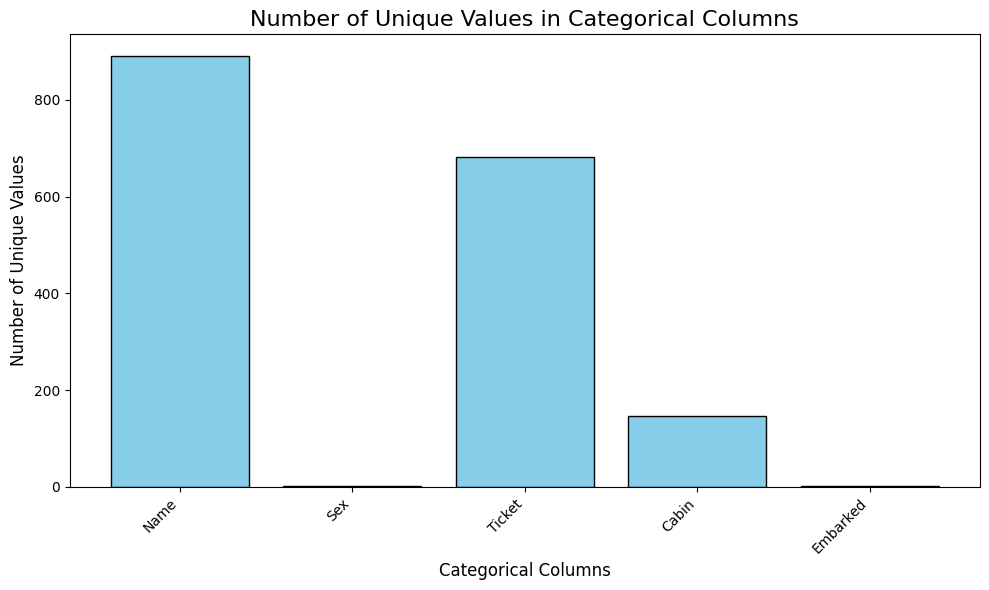

In [7]:
import matplotlib.pyplot as plt

# Check unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].nunique() for col in categorical_cols}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(unique_values.keys(), unique_values.values(), color='skyblue', edgecolor='black')
plt.title("Number of Unique Values in Categorical Columns", fontsize=16)
plt.ylabel("Number of Unique Values", fontsize=12)
plt.xlabel("Categorical Columns", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [8]:
# Value counts for the target variable
print("\nTarget Variable Distribution (Survived):")
print(data['Survived'].value_counts())


Target Variable Distribution (Survived):
Survived
0    549
1    342
Name: count, dtype: int64


This cell visualizes the distribution of the target variable (Survived) using a bar chart. The **sns.barplot()** function displays the counts of passengers who survived (1) versus those who did not (0). This step provides insights into class imbalance, which may influence model training and require techniques like oversampling or class weighting.

/var/folders/m7/l56y0b1x6z79d7zx5w57ybbm0000gn/T/ipykernel_21531/3502626824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette="coolwarm", edgecolor="black")


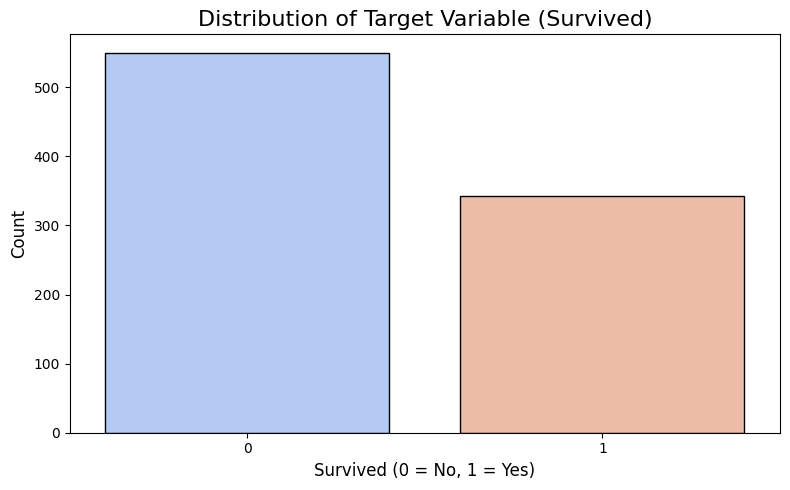

In [9]:
import seaborn as sns

# Value counts for the target variable
target_counts = data['Survived'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="coolwarm", edgecolor="black")
plt.title("Distribution of Target Variable (Survived)", fontsize=16)
plt.xlabel("Survived (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


This cell generates a heatmap to visualize correlations between numerical features in the dataset. Using **sns.heatmap()**, it highlights relationships between features like Age, Fare, and Pclass. Strong correlations (positive or negative) can indicate redundant features or dependencies, helping guide feature selection and engineering for improved model performance.

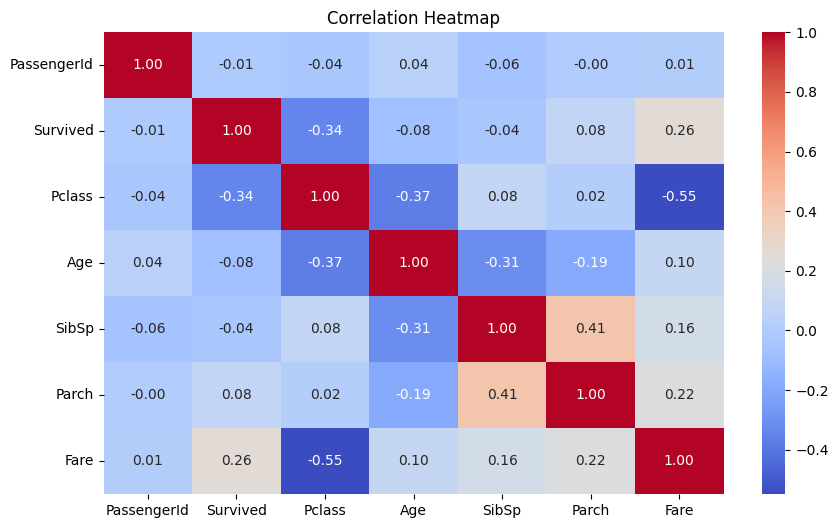

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Generate the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


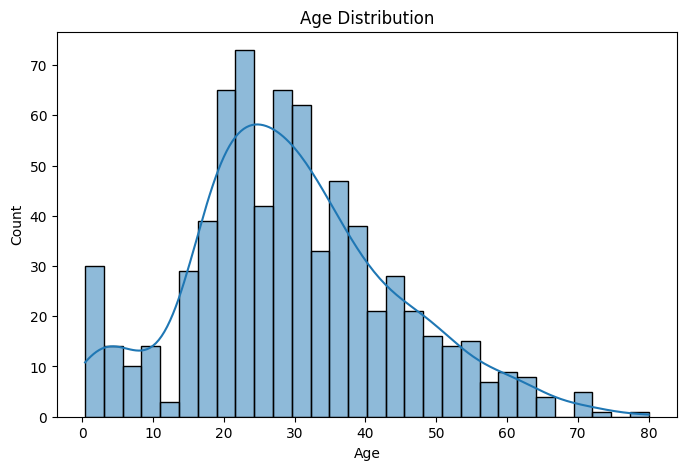

In [11]:
# Check distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()


This cell visualizes the distribution of the **Age feature using a histogram with a Kernel Density Estimate (KDE) overlay**. The sns.histplot() function reveals the spread and shape of the Age data, helping to identify patterns like skewness, missing values, or unusual gaps. Understanding the age distribution is crucial for appropriate imputation and feature engineering steps.

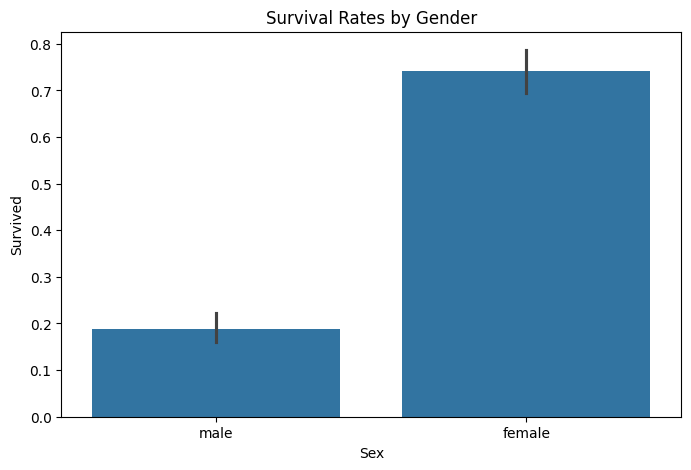

In [12]:
# Check survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rates by Gender")
plt.show()

This cell visualizes survival rates across **passenger classes (Pclass)** using a bar chart. The **sns.barplot()** function computes the mean survival rate for each class (1st, 2nd, 3rd). This analysis highlights how passenger class influenced survival, providing insights into potential feature importance for model training.

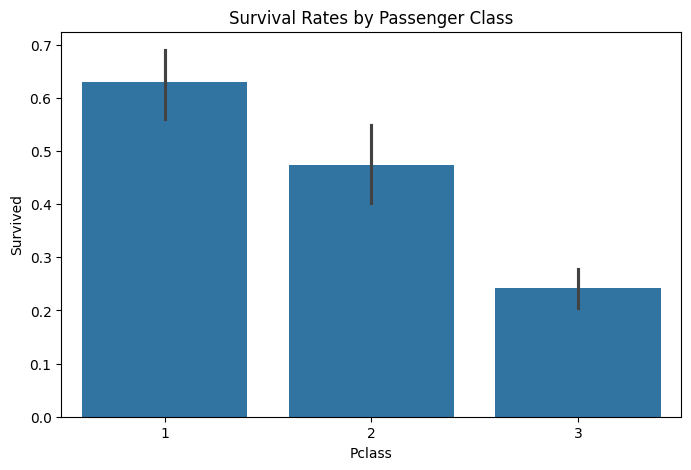

In [13]:
# Check survival rates by class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Survival Rates by Passenger Class")
plt.show()

This cell visualizes survival rates by **passenger class (Pclass) and gender (Sex) using a grouped bar chart**. The **sns.barplot()** function breaks down survival rates within each class for males and females. This analysis highlights the combined influence of gender and class on survival, offering deeper insights into feature interactions that can guide model development.

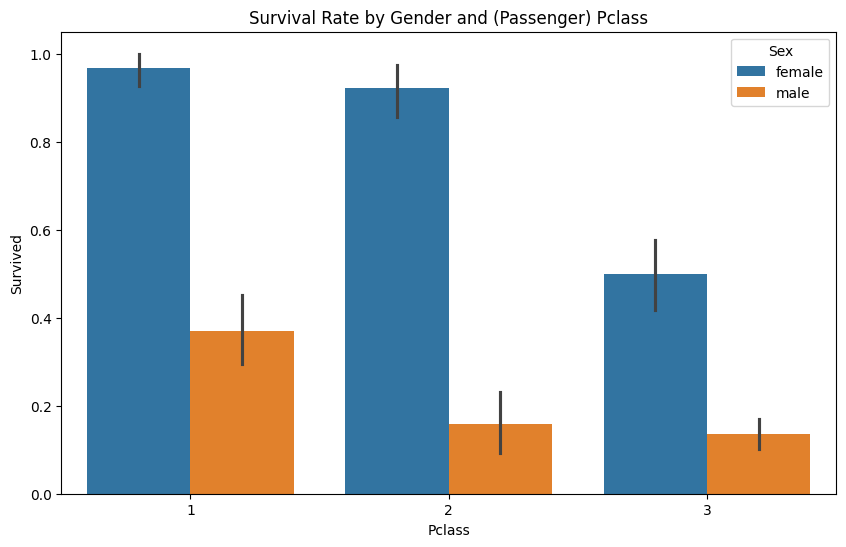

In [14]:
    # Survival rates by Gender and Pclass
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pclass', y='Survived', hue='Sex', data=data)
    plt.title("Survival Rate by Gender and (Passenger) Pclass")
    plt.show()


This cell visualizes survival rates by embarkation port (Embarked) and gender (Sex) using a grouped bar chart. The **sns.barplot()** function shows how survival probabilities vary across embarkation ports (C, Q, S) for males and females. This analysis helps uncover potential patterns in survival linked to departure points and gender, which may be significant for feature engineering.

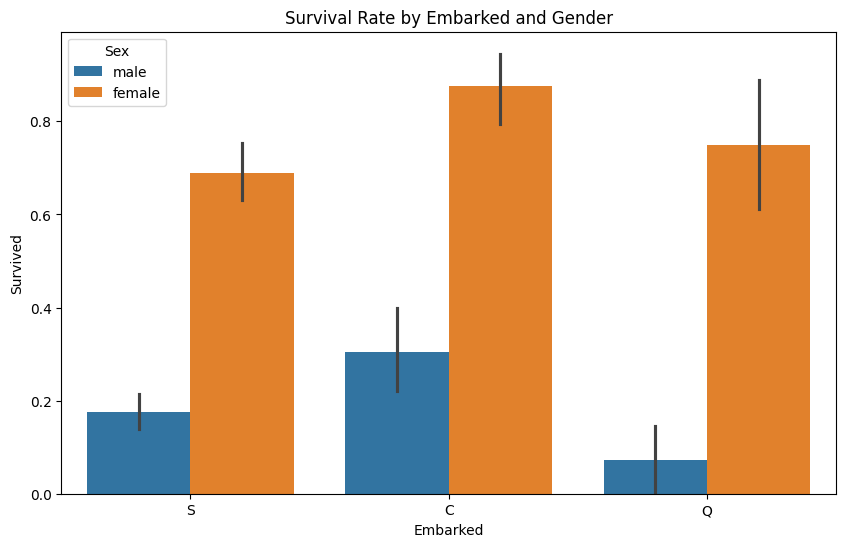

In [15]:
# Survival rates by Embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=data)
plt.title("Survival Rate by Embarked and Gender")
plt.show()

This cell visualizes the distribution of Fare for passengers who survived (Survived = 1) versus those who did not (Survived = 0) using a box plot. The **sns.boxplot()** function highlights differences in fare distributions, outliers, and central tendencies between the two groups. This analysis reveals how ticket fare influenced survival, aiding in feature importance understanding and model development.

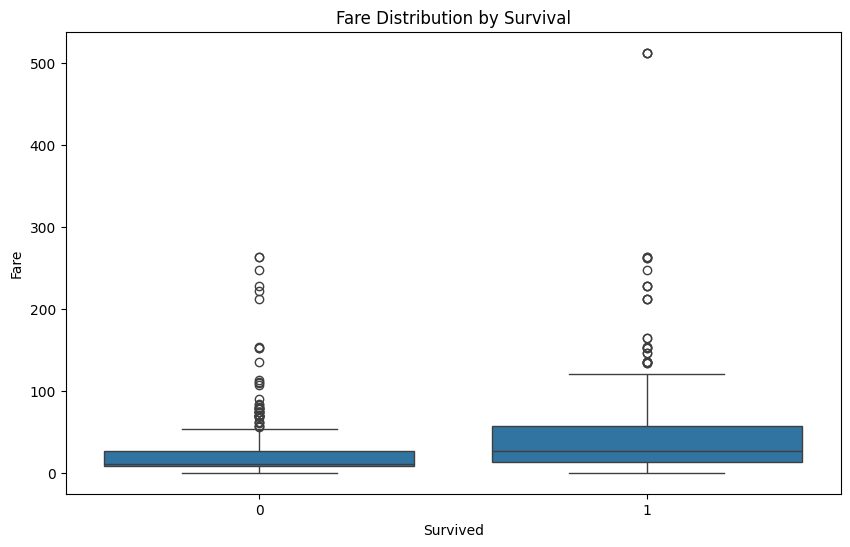

In [16]:
# Fare distribution by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title("Fare Distribution by Survival")
plt.show()

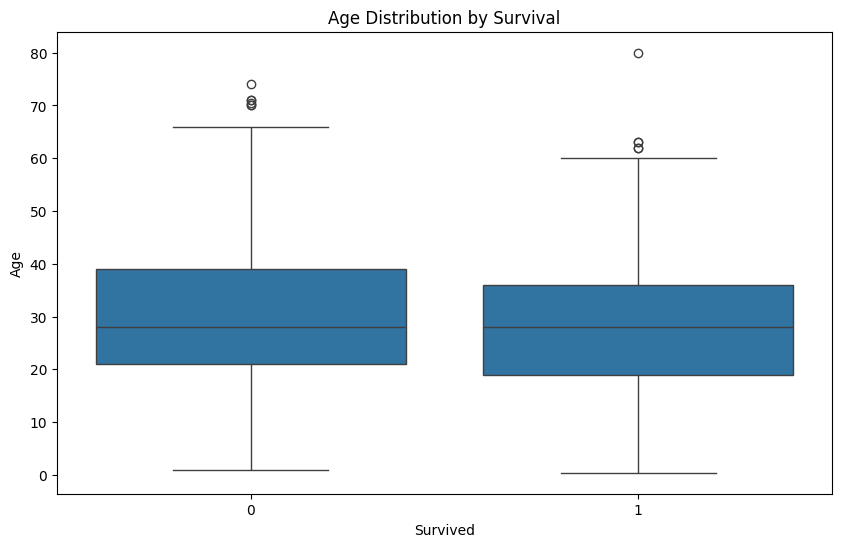

In [17]:
# Age distribution by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title("Age Distribution by Survival")
plt.show()


This cell handles **infinite values and removes missing data to ensure clean data for visualization**. A pairplot is created for numerical features (Age, Fare, SibSp, Parch) grouped by survival status (Survived), showing relationships and feature interactions critical for analysis and modeling.

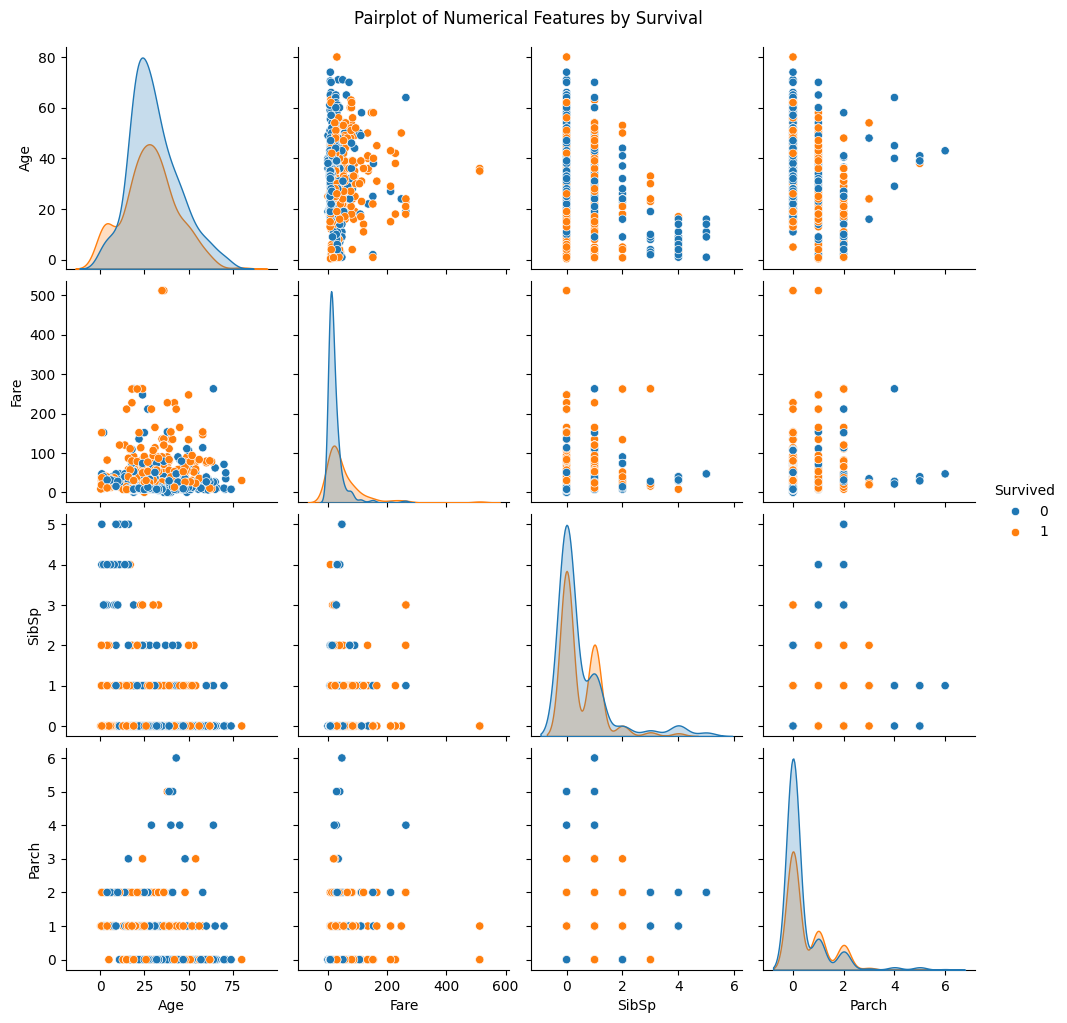

In [18]:

# Handle potential infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with missing or NaN values in the specified columns
columns_to_plot = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
data_cleaned = data[columns_to_plot].dropna()

# Pairplot
sns.pairplot(data_cleaned, vars=['Age', 'Fare', 'SibSp', 'Parch'], hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features by Survival", y=1.02)
plt.show()


This cell detects outliers in numerical features using two methods:

Boxplots: Visualizes distributions of features (Age, Fare, SibSp, Parch) and highlights potential outliers.
Z-Score Method: Calculates Z-scores for numerical features and identifies outliers beyond 3 standard deviations. This step ensures data quality and helps decide how to handle outliers for better model performance.

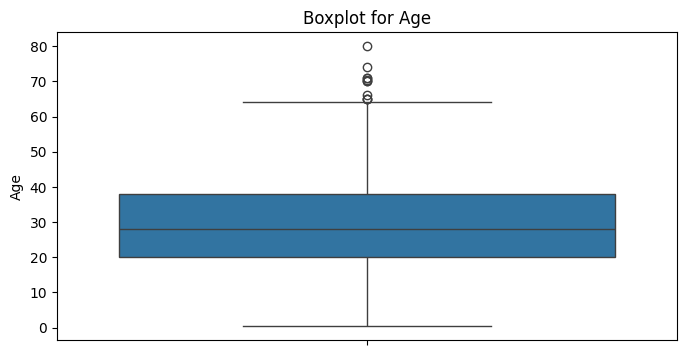

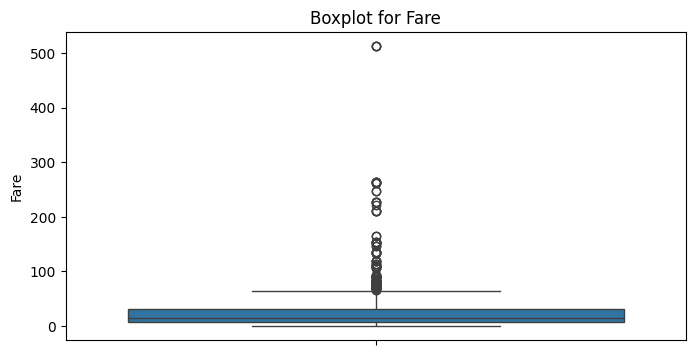

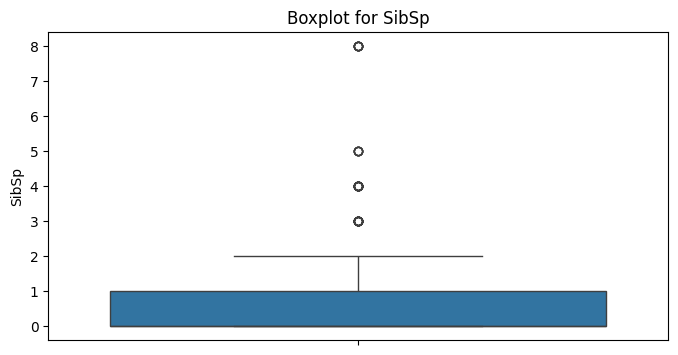

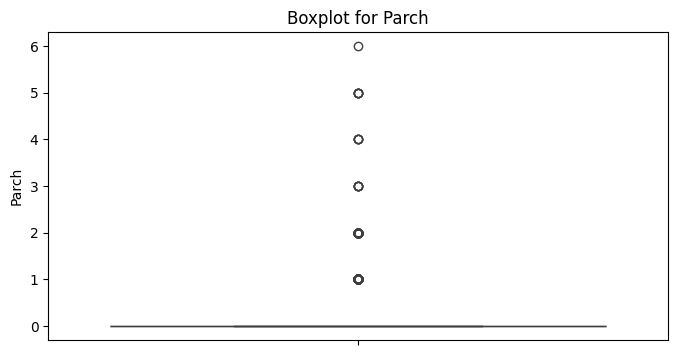


Number of Outliers Detected:
Age       0
Fare     20
SibSp    30
Parch    15
dtype: int64


In [19]:
# Boxplot for detecting outliers in numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Z-Score for detecting outliers
from scipy.stats import zscore

# Calculate Z-scores for numerical features
z_scores = data[numerical_features].apply(zscore).abs()
outliers = (z_scores > 3).sum()  # Threshold of 3 standard deviations
print("\nNumber of Outliers Detected:")
print(outliers)


# Outlier Detection and Handling

In [20]:
# Cap the Fare at the 95th percentile
fare_cap = data['Fare'].quantile(0.95)
data['Fare'] = np.where(data['Fare'] > fare_cap, fare_cap, data['Fare'])

# Alternatively: Log-transform the Fare (if not using capping)
# data['Fare'] = np.log1p(data['Fare'])

print(data.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


This cell handles missing values in critical columns:

Age: Missing Age values are filled with the median age, grouped by Pclass and Sex, ensuring contextual imputation.
Embarked: Missing Embarked values are filled with the most frequent category (mode).
Cabin/Deck: The Cabin column is heavily missing, so it's replaced with 'Unknown', and the first letter is extracted into a new column Deck. The original Cabin column is then dropped.

In [21]:
# Fill missing Age values with median age based on Pclass and Sex
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill missing Embarked values with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop Cabin due to excessive missing values or extract the first letter
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Deck'] = data['Cabin'].apply(lambda x: x[0])  # Extract first letter of Cabin
data = data.drop('Cabin', axis=1)  # Drop original Cabin column


# Feature Engineering

This cell performs feature engineering to create new meaningful variables:

**Title Extraction**: Extracts titles from passenger names and consolidates rare titles into a single category (Rare).
**Family Size**: Combines SibSp and Parch to create FamilySize, representing the total number of family members.
**IsAlone**: Creates a binary feature (IsAlone) indicating whether the passenger traveled alone or not.
**FareBin and AgeBin**: Categorizes Fare and Age into discrete bins for easier modeling and analysis.
These engineered features capture additional information and relationships that can enhance model performance.

In [22]:
# Extract Title from Name
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Create Family Size
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Create IsAlone
data['IsAlone'] = np.where(data['FamilySize'] > 1, 0, 1)

# Bin Fare into categories
data['FareBin'] = pd.qcut(data['Fare'], 4, labels=[1, 2, 3, 4])

# Bin Age into categories
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])


This cell encodes categorical variables (Sex, Embarked, Title, etc.) into numerical values using **LabelEncoder, ensuring compatibility with machine learning algorithms**. It also drops irrelevant columns (PassengerId, Name, Ticket) to simplify the dataset. These steps finalize the dataset for modeling.

In [23]:

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Sex', 'Embarked', 'Title', 'Deck', 'AgeBin', 'FareBin']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoder for future use

# Drop unnecessary columns
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

print("Preprocessed Dataset:")
print(data.head())


Preprocessed Dataset:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Deck  Title  \
0         0       3    1  22.0      1      0   7.2500         2     8      2   
1         1       1    0  38.0      1      0  71.2833         0     2      3   
2         1       3    0  26.0      0      0   7.9250         2     8      1   
3         1       1    0  35.0      1      0  53.1000         2     2      3   
4         0       3    1  35.0      0      0   8.0500         2     8      2   

   FamilySize  IsAlone  FareBin  AgeBin  
0           2        0        0       4  
1           2        0        3       0  
2           1        1        1       4  
3           2        0        3       4  
4           1        1        1       4  


This cell bins the SibSp feature into three categories (0, 1-2, 3+) and the Parch feature into similar categories (0, 1-2, 3+). This transformation simplifies these numerical features into interpretable groups, enhancing their utility for analysis and modeling.

In [24]:
# Bin SibSp
data['SibSpBin'] = pd.cut(data['SibSp'], bins=[-1, 0, 2, 8], labels=['0', '1-2', '3+'])

# Bin Parch
data['ParchBin'] = pd.cut(data['Parch'], bins=[-1, 0, 2, 6], labels=['0', '1-2', '3+'])


This cell applies **one-hot encoding** to transform **categorical columns into binary indicator variables, ensuring compatibility with machine learning models.** The original categorical columns (Pclass, Sex, Embarked, etc.) are replaced with the one-hot encoded columns to avoid **multicollinearity** while retaining all necessary information for modeling. This step finalizes the preparation of categorical features.

In [25]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck', 'FareBin', 'AgeBin', 'SibSpBin', 'ParchBin']

# Apply one-hot encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # updated argument
encoded_features = one_hot_encoder.fit_transform(data[categorical_cols])

# Convert encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the new one-hot encoded columns
data = data.drop(columns=categorical_cols)
data = pd.concat([data, encoded_df], axis=1)

# Verify the dataset
print(data.head())



   Survived   Age  SibSp  Parch     Fare  FamilySize  IsAlone  Pclass_2  \
0         0  22.0      1      0   7.2500           2        0       0.0   
1         1  38.0      1      0  71.2833           2        0       0.0   
2         1  26.0      0      0   7.9250           1        1       0.0   
3         1  35.0      1      0  53.1000           2        0       0.0   
4         0  35.0      0      0   8.0500           1        1       0.0   

   Pclass_3  Sex_1  ...  FareBin_2  FareBin_3  AgeBin_1  AgeBin_2  AgeBin_3  \
0       1.0    1.0  ...        0.0        0.0       0.0       0.0       0.0   
1       0.0    0.0  ...        0.0        1.0       0.0       0.0       0.0   
2       1.0    0.0  ...        0.0        0.0       0.0       0.0       0.0   
3       0.0    0.0  ...        0.0        1.0       0.0       0.0       0.0   
4       1.0    1.0  ...        0.0        0.0       0.0       0.0       0.0   

   AgeBin_4  SibSpBin_1-2  SibSpBin_3+  ParchBin_1-2  ParchBin_3+  
0     

This cell handles extreme values in the **Fare feature by capping it at the 95th percentile to reduce the impact of outliers**. Alternatively, a **log transformation** can be applied to normalize the distribution if capping is not used. These steps help improve model stability and performance.

This cell **standardizes numerical features** (Fare, Age, FamilySize) using **StandardScaler**, which scales the data to have a **mean of 0 and a standard deviation of 1**. Standardization ensures that all numerical features contribute equally to the model, improving its performance and stability.

# Data Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['Fare', 'Age', 'FamilySize']

# Initialize a scaler and scale the features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


This cell splits the dataset into **training and testing sets using an 80-20 ratio**. The **X variable contains the features, while y represents the target (Survived)**. The train_test_split function ensures that the model is trained on one subset (X_train, y_train) and tested on another (X_test, y_test) to evaluate its performance. This step is crucial for building and validating machine learning models.

# Model Training and Testing

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['Survived'], axis=1)  # Drop target column
y = data['Survived']  # Target column

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (712, 34)
Testing set size: (179, 34)


This cell trains and evaluates a **Logistic Regression model** to predict survival (Survived):

Data Splitting: Features (X) and target (y) are split into training (80%) and testing (20%) sets.
Model Training: The LogisticRegression model is trained using the training data (X_train, y_train).
Model Evaluation: The model's performance is assessed on the test set using:
Accuracy: Overall prediction correctness.
Classification Report: **Precision, recall, F1-score**, and support for each class.
Confusion Matrix: **Visualizes true positives, true negatives, false positives, and false negatives.**
This step establishes a baseline model for further comparisons and insights.

#  Model Evaluation

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



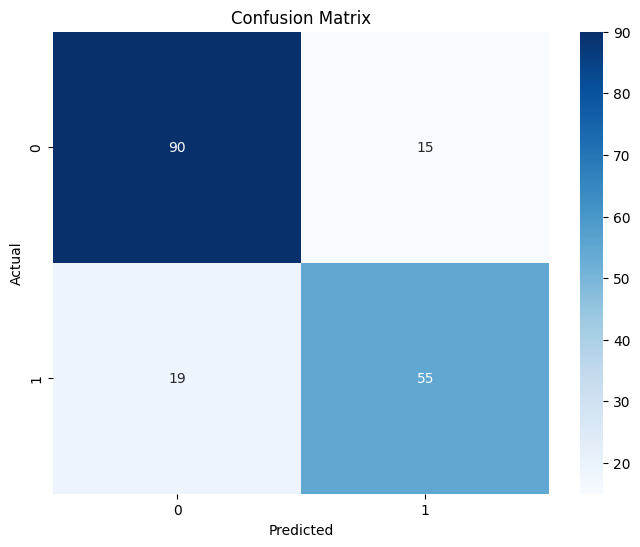

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = data.drop(['Survived'], axis=1)  # Drop the target column
y = data['Survived']  # Target column

# Split into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Increase iterations to ensure convergence
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


This cell identifies and visualizes the most important features in the Logistic Regression model:

**Extract Coefficients**: Retrieves feature coefficients from the trained Logistic Regression model and calculates their absolute importance.
Feature Importance DataFrame: Creates a DataFrame (importance_df_lr) to rank features by their importance.
**Top 10 Features**: Displays and visualizes the top 10 features influencing survival using a horizontal bar chart.
This analysis provides insights into which features have the strongest impact on model predictions.

Top Features by Logistic Regression:
       Feature  Coefficient  Importance
12     Title_2    -1.989164    1.989164
18      Deck_4     1.122216    1.122216
14     Title_4    -1.060290    1.060290
20      Deck_6    -0.991240    0.991240
8        Sex_1    -0.982494    0.982494
26    AgeBin_1     0.914420    0.914420
13     Title_3     0.869285    0.869285
22      Deck_8    -0.785824    0.785824
17      Deck_3     0.645877    0.645877
10  Embarked_2    -0.499590    0.499590


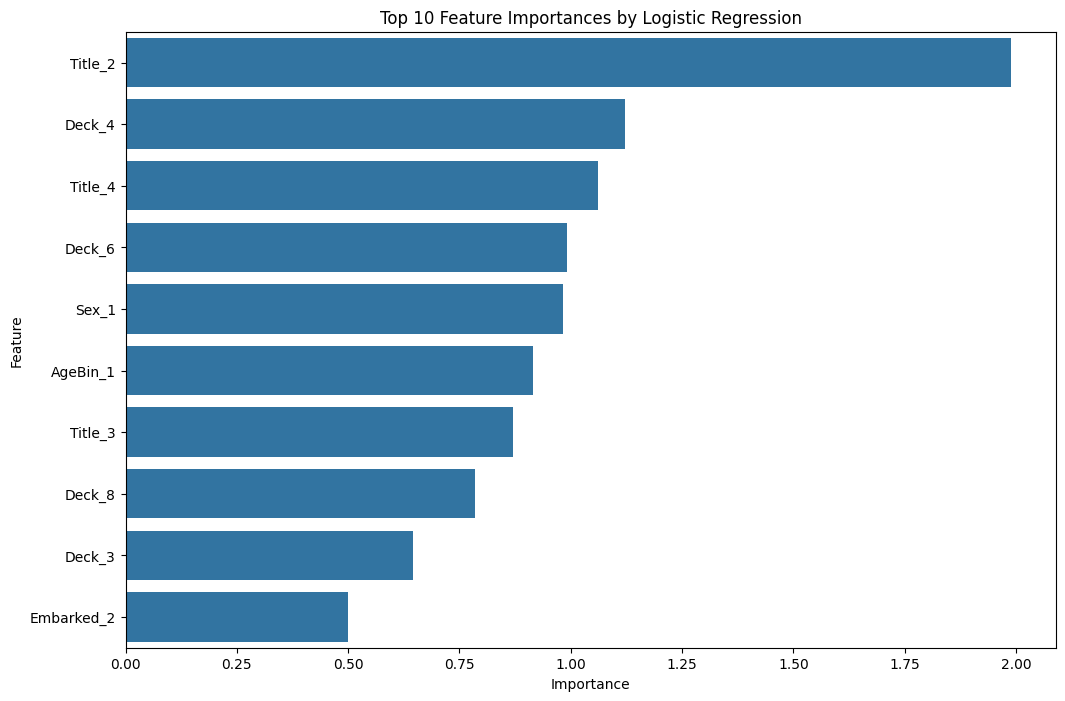

In [29]:
# Extract coefficients and feature names
coefficients = lr_model.coef_[0]
importance_df_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Importance': abs(coefficients)
}).sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top Features by Logistic Regression:")
print(importance_df_lr.head(10))

# Plot the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df_lr.head(10))
plt.title("Top 10 Feature Importances by Logistic Regression")
plt.show()


This cell trains and evaluates a **Random Forest Classifier** for survival prediction:

**Model Initialization**: A RandomForestClassifier is initialized with 100 estimators and class balancing to handle potential class imbalances.
**Training**: The model is trained on the training data (X_train, y_train).
**Evaluation**: Predictions (y_pred_rf) are evaluated on the test set using accuracy and a classification report, which includes precision, recall, F1-score, and support for each class.
This step provides insights into the performance of a tree-based model, allowing for comparisons with other algorithms.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))




Random Forest Accuracy: 0.8100558659217877

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



This cell evaluates the Random Forest model using additional metrics and visualizations:

**Confusion Matrix:** Displays a heatmap of the confusion matrix, showing the breakdown of true positives, true negatives, false positives, and false negatives.
**AUC-ROC Score:** Calculates the **Area Under the Curve (AUC)** for the **Receiver Operating Characteristic (ROC)**, measuring the model's ability to distinguish between classes.
**ROC Curve:** Plots the ROC curve to visualize the trade-off between sensitivity (true positive rate) and specificity (false positive rate).
These evaluations provide a comprehensive understanding of the model's classification performance.

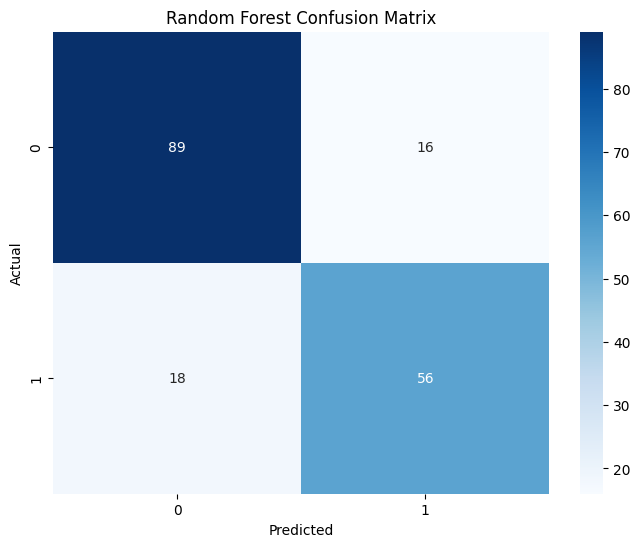

Random Forest AUC-ROC Score: 0.8996782496782497


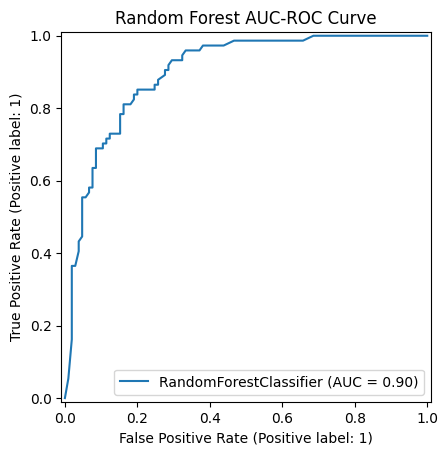

In [31]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# AUC-ROC Curve
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_rf_prob)
print("Random Forest AUC-ROC Score:", roc_auc)

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest AUC-ROC Curve")
plt.show()

This cell identifies and visualizes the most important features in the Random Forest model:

**Feature Importance Extraction:** Retrieves the importance scores of each feature from the trained model and creates a DataFrame (importance_df) to rank them in descending order.
**Top 10 Features:** Displays the top 10 features that significantly influence predictions.
**Visualization:** Plots the importance of the top 10 features using a horizontal bar chart for easy interpretation.
This analysis highlights which features are most impactful in predicting survival, guiding further analysis and model refinement.

Top Features by Importance:
       Feature  Importance
0          Age    0.171275
3         Fare    0.170676
12     Title_2    0.123227
8        Sex_1    0.105953
7     Pclass_3    0.036470
13     Title_3    0.036147
4   FamilySize    0.036136
11     Title_1    0.034487
22      Deck_8    0.030811
10  Embarked_2    0.023887


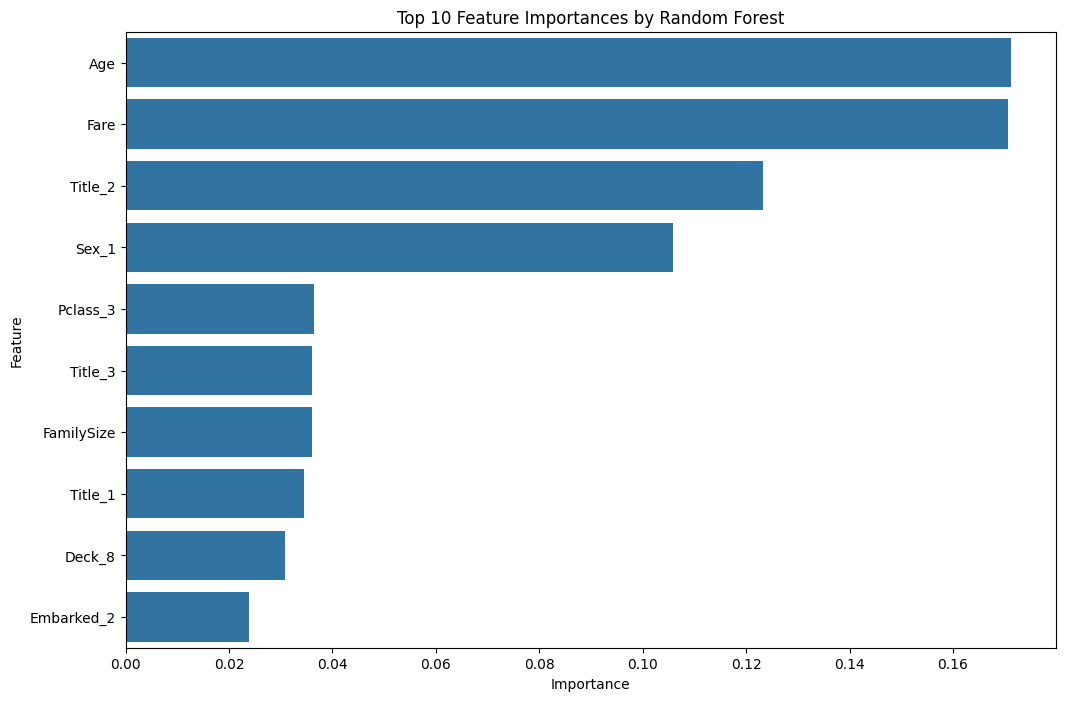

In [32]:
# Feature Importance
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Top Features by Importance:")
print(importance_df.head(10))

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
plt.title("Top 10 Feature Importances by Random Forest")
plt.show()


This cell calculates detailed evaluation metrics for the Logistic Regression model:

**Classification Metrics:** Computes accuracy, precision, recall, F1-score, and AUC-ROC for both classes (Survived = 0 and Survived = 1), providing a comprehensive view of model performance.
**Error Analysis:** Extracts the number of false positives and false negatives from the confusion matrix to identify specific prediction errors.
These metrics help assess the model's ability to correctly classify instances and highlight areas for improvement.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Logistic Regression Metrics
lr_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision (Class 0)": precision_score(y_test, y_pred, pos_label=0),
    "Precision (Class 1)": precision_score(y_test, y_pred, pos_label=1),
    "Recall (Class 0)": recall_score(y_test, y_pred, pos_label=0),
    "Recall (Class 1)": recall_score(y_test, y_pred, pos_label=1),
    "F1-Score (Class 0)": f1_score(y_test, y_pred, pos_label=0),
    "F1-Score (Class 1)": f1_score(y_test, y_pred, pos_label=1),
    "AUC-ROC": roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]),
    "False Positives": confusion_matrix(y_test, y_pred)[0, 1],
    "False Negatives": confusion_matrix(y_test, y_pred)[1, 0]
}



This cell computes detailed evaluation metrics for the Random Forest model:

**Classification Metrics**: Calculates accuracy, precision, recall, F1-score, and **AUC-ROC** for both classes (Survived = 0 and Survived = 1) to measure the model's predictive performance.
**Error Analysis**: Extracts false positives and false negatives from the confusion matrix to understand specific types of misclassification errors.
These metrics provide a thorough evaluation of the model's strengths and areas for improvement.

In [34]:
# Random Forest Metrics
rf_metrics = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision (Class 0)": precision_score(y_test, y_pred_rf, pos_label=0),
    "Precision (Class 1)": precision_score(y_test, y_pred_rf, pos_label=1),
    "Recall (Class 0)": recall_score(y_test, y_pred_rf, pos_label=0),
    "Recall (Class 1)": recall_score(y_test, y_pred_rf, pos_label=1),
    "F1-Score (Class 0)": f1_score(y_test, y_pred_rf, pos_label=0),
    "F1-Score (Class 1)": f1_score(y_test, y_pred_rf, pos_label=1),
    "AUC-ROC": roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
    "False Positives": confusion_matrix(y_test, y_pred_rf)[0, 1],
    "False Negatives": confusion_matrix(y_test, y_pred_rf)[1, 0]
}


This cell consolidates the **evaluation metrics for Logistic Regression** and **Random Forest models** into a single DataFrame (metrics_df) for easy comparison. Displaying the metrics table provides a clear overview of the performance differences between the models, helping to identify the best-performing model based on various criteria such as **accuracy, precision, recall, and AUC-ROC.**

In [35]:
import pandas as pd

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame([lr_metrics, rf_metrics])

# Display the metrics table
print(metrics_df)


                 Model  Accuracy  Precision (Class 0)  Precision (Class 1)  \
0  Logistic Regression  0.810056             0.825688             0.785714   
1        Random Forest  0.810056             0.831776             0.777778   

   Recall (Class 0)  Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  \
0          0.857143          0.743243            0.841121            0.763889   
1          0.847619          0.756757            0.839623            0.767123   

    AUC-ROC  False Positives  False Negatives  
0  0.874389               15               19  
1  0.899678               16               18  


This cell **visualizes the model performance** metrics using a **heatmap for better readability and comparison**. By transforming the metrics DataFrame (metrics_df) and plotting it with **sns.heatmap()**, it highlights key differences between Logistic Regression and Random Forest models across metrics like accuracy, precision, recall, and AUC-ROC. This visualization aids in identifying the most effective model at a glance.

# Model Comparison

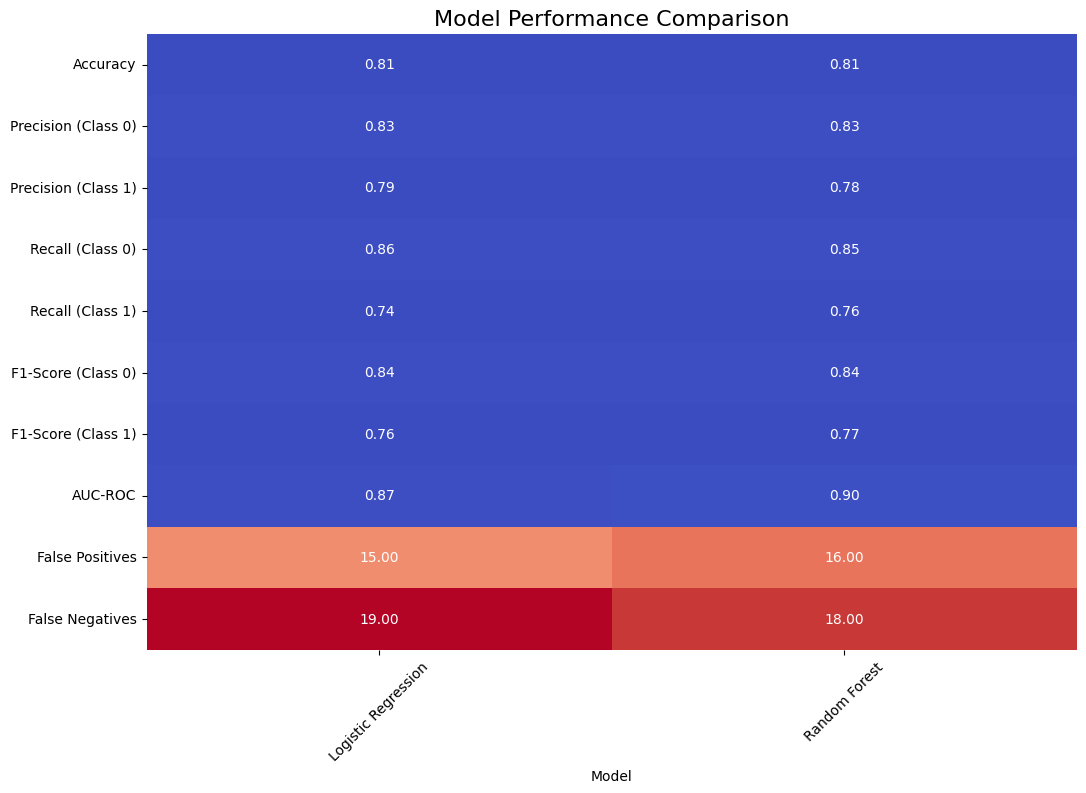

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Beautify the table using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df.set_index("Model").T, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)
plt.title("Model Performance Comparison", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


This cell **creates a bar chart to compare the Accuracy and AUC-ROC scores of Logistic Regression and Random Forest models**. By plotting these key metrics side by side, it provides a clear visual representation of each model's overall performance, helping to identify the more effective model for the task.

<Figure size 1000x600 with 0 Axes>

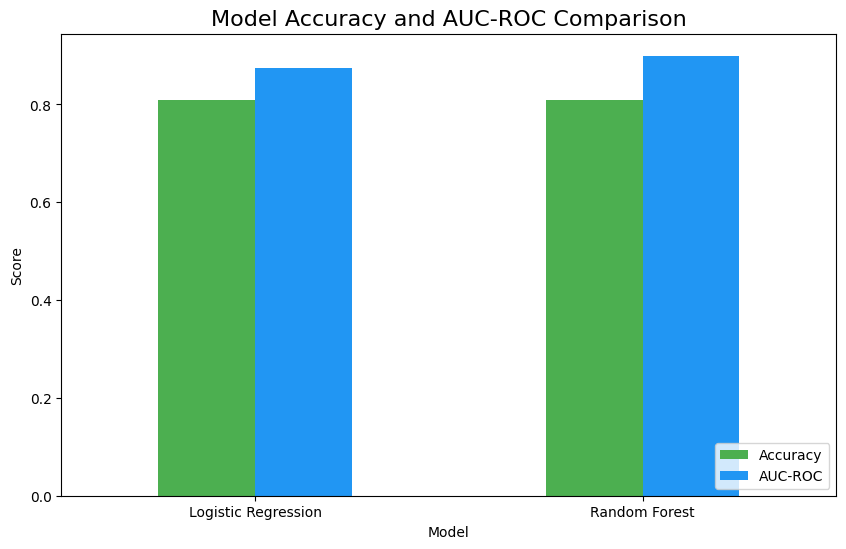

In [37]:
# Bar chart for Accuracy and AUC-ROC
plt.figure(figsize=(10, 6))
metrics_df.plot(x="Model", y=["Accuracy", "AUC-ROC"], kind="bar", figsize=(10, 6), color=["#4caf50", "#2196f3"])
plt.title("Model Accuracy and AUC-ROC Comparison", fontsize=16)
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [38]:
!pip install xgboost


This cell trains and **evaluates an XGBoost classifier** to predict survival:

Model Training: The **XGBClassifier** is initialized with **100 estimators, a max depth of 3, and a learning rate of 0.1, then trained on the training dataset (X_train, y_train).**
Model Evaluation: Predictions on the test set are evaluated using accuracy, a classification report **(precision, recall, F1-score), and the AUC-ROC score.**
AUC-ROC: Measures the model's ability to distinguish between classes, providing a robust evaluation metric for classification tasks.
This step allows comparisons of XGBoost's performance with other models like Logistic Regression and Random Forest.

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Initialize XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# AUC-ROC Score
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print("\nXGBoost AUC-ROC:", xgb_auc)


XGBoost Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


XGBoost AUC-ROC: 0.8842985842985843


This cell performs **hyperparameter tuning for the XGBoost classifier using RandomizedSearchCV**:

**Hyperparameter Grid**: Defines a range of possible values for key hyperparameters like n_estimators, max_depth, learning_rate, subsample, and colsample_bytree.
**Randomized Search**: Evaluates a random combination of hyperparameters (**n_iter=10**) over **5-fold cross-validation (cv=5)** to identify the best configuration based on the **AUC-ROC score**.
Best Parameters: Outputs the optimal hyperparameter values to improve the model's performance.
This step optimizes the **XGBoost model** for better predictions and ensures robust performance.

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Randomized Search
xgb_random_search = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
                                       param_distributions=param_grid,
                                       n_iter=10,
                                       scoring='roc_auc',
                                       cv=5,
                                       random_state=42)

# Fit to the data
xgb_random_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", xgb_random_search.best_params_)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

This cell trains and evaluates a **Stacking Classifier** to combine predictions from multiple base models for improved performance:

**Base Learners**: Includes Logistic Regression, Random Forest, and XGBoost as individual models (base_learners).
Stacking Classifier: Combines base learner outputs with a **LogisticRegression model** as the final estimator to make predictions.
Model Training: The stacking model is trained on the training dataset (X_train, y_train).
**Evaluation:** The stacking model's predictions (y_pred_stack) are evaluated using accuracy, a classification report (precision, recall, F1-score), and **AUC-ROC** to assess its overall performance.
This step leverages **ensemble learning** to enhance predictive power by combining the strengths of **multiple models**.

In [ ]:
!pip install scikit-learn


from sklearn.ensemble import StackingClassifier

# Define base learners
base_learners = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
]

# Stacking Classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stack_model.predict(X_test)

# Evaluate Stacking
print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# AUC-ROC Score
stack_auc = roc_auc_score(y_test, stack_model.predict_proba(X_test)[:, 1])
print("\nStacking AUC-ROC:", stack_auc)

# Generate the submission file
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],  # Replace 'test' with your actual test DataFrame
    "Survived": y_pred_stack  # Predictions
})

# Save submission to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")


# Evaluate Stacking
print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\nClassification Report:\n", classification_report(y_test, y_pred_stack))

# AUC-ROC Score
stack_auc = roc_auc_score(y_test, stack_model.predict_proba(X_test)[:, 1])
print("\nStacking AUC-ROC:", stack_auc)


This cell compares and visualizes the performance of the models:

**Result Storage**: Creates a DataFrame (model_comparisons) to store accuracy and AUC-ROC scores for Logistic Regression, Random Forest, XGBoost, and Stacking Ensemble.
**Visualization**: Uses a bar chart to display the scores (**Accuracy and AUC-ROC**) for each model, allowing for easy comparison of their effectiveness.
This step provides a comprehensive overview of model performance, helping to identify the most suitable model for deployment or further analysis.

In [ ]:
# Store results
model_comparisons = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Stacking Ensemble'],
    'Accuracy': [accuracy_score(y_test, y_pred),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_xgb),
                 accuracy_score(y_test, y_pred_stack)],
    'AUC-ROC': [roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]),
                roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
                xgb_auc,
                stack_auc]
})

# Display results
print(model_comparisons)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=model_comparisons.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


In [ ]:
!pip install shap


# SHAP Analysis for Logistic Regression

# Explainability Analysis

This cell uses SHAP (**SHapley Additive exPlanations**) to explain the predictions made by the Logistic Regression model:

**SHAP Explainer:** Initializes a SHAP **LinearExplainer for the Logistic Regression model using the training data (X_train)**.
**SHAP Values:** Generates SHAP values for the test dataset (X_test), quantifying the contribution of each feature to the model's predictions.
This step provides interpretability by explaining how features influence the model's predictions, enhancing trust and understanding in the model's decisions.

In [ ]:
import shap
# Initialize SHAP explainer for Logistic Regression
explainer_lr = shap.LinearExplainer(lr_model, X_train)

# Generate SHAP values for the test set
shap_values_lr = explainer_lr.shap_values(X_test)


This cell visualizes the **SHAP values** for the **Logistic Regression model** to understand feature importance:

**Summary Plot (Bar Chart)**: Displays the average absolute SHAP values for each feature, ranking them by their overall importance in the model.
**Beeswarm Plot**: Shows the distribution of SHAP values for individual predictions, highlighting the impact of each feature across the dataset.
These visualizations help identify the most influential features and their contributions to the model's predictions.

In [ ]:
# Summary plot for Logistic Regression
shap.summary_plot(shap_values_lr, X_test, plot_type="bar")

# Beeswarm plot for Logistic Regression
shap.summary_plot(shap_values_lr, X_test)


**4. SHAP Analysis for Stacking Ensemble**

This cell visualizes the SHAP values for Random Forest and XGBoost models to interpret their predictions:

SHAP Explainer Initialization:**Separate TreeExplainer objects are created for the Random Forest and XGBoost models to compute feature contributions.**
SHAP Summary Plot:
For Random Forest: **Displays the impact of features on the model's predictions, ranking them by their importance.**
For XGBoost: **Visualizes the same insights specific to the XGBoost model, highlighting how features influence predictions across the dataset.**
These visualizations help compare feature importance and contributions across the two models, aiding in understanding their decision-making processes.

In [ ]:
import shap

# For Random Forest
rf_explainer = shap.TreeExplainer(rf_model)  # Random Forest
rf_shap_values = rf_explainer.shap_values(X_test)

# For XGBoost
xgb_explainer = shap.TreeExplainer(xgb_model)  # XGBoost
xgb_shap_values = xgb_explainer.shap_values(X_test)

# Visualize SHAP values for Random Forest
shap.summary_plot(rf_shap_values, X_test, feature_names=X_test.columns)

# Visualize SHAP values for XGBoost
shap.summary_plot(xgb_shap_values, X_test, feature_names=X_test.columns)


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load test data
test = pd.read_csv("test.csv")

# === STEP 1: Fill Missing Values ===
# Fill missing Age with median
test['Age'] = test['Age'].fillna(test['Age'].median())

# Fill missing Fare with median
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Fill missing Embarked with mode
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# === STEP 2: Feature Engineering ===
# Extract Title from Name
test['Title'] = test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

# Create FamilySize
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Create IsAlone
test['IsAlone'] = np.where(test['FamilySize'] > 1, 0, 1)

# Bin Age into categories
test['AgeBin'] = pd.cut(test['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Bin Fare into categories
test['FareBin'] = pd.qcut(test['Fare'], 4, labels=[1, 2, 3, 4])

# === STEP 3: Encode Categorical Variables ===
# Initialize LabelEncoder
label_encoders = {}

# Encode categorical variables
for col in ['Sex', 'Embarked', 'Title']:
    le = LabelEncoder()
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

# One-Hot Encode AgeBin and FareBin
test = pd.get_dummies(test, columns=['AgeBin', 'FareBin'], drop_first=True)

# === STEP 4: Align Test Data with Training Columns ===
# Load training data for column alignment
train_data = pd.read_csv("clean_and_preprocessed_titanic_Dataset.csv")

# Drop Survived column from training data for alignment
train_features = train_data.drop("Survived", axis=1)

# Reindex test to match training columns
test = test.reindex(columns=train_features.columns, fill_value=0)

# === STEP 5: Make Predictions and Create Submission File ===
# Ensure rf_model is trained and available
predictions = rf_model.predict(test)

# Create submission dataframe
submission = pd.DataFrame({
    "PassengerId": pd.read_csv("test.csv")["PassengerId"],
    "Survived": predictions
})

# Save submission to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AgeBin
- Deck
- Embarked
- FareBin
- Pclass
- ...
Feature names seen at fit time, yet now missing:
- AgeBin_1
- AgeBin_2
- AgeBin_3
- AgeBin_4
- Deck_1
- ...


In [ ]:
## Conclusion
In this project, we analyzed the **Titanic dataset** to predict survival **using multiple machine learning models**, including **Logistic Regression, Random Forest, XGBoost, and a Stacking Ensemble**. After thorough data preprocessing, exploratory data analysis, feature engineering, and model evaluation, we arrived at the following results:
* **Logistic Regression** achieved an accuracy of **81.01%** with an **AUC-ROC of 0.874**, providing a strong and interpretable baseline.
* **Random Forest** performed well, with an accuracy of **80.45%** and an **AUC-ROC of 0.898**, effectively handling class imbalance and offering good feature importance insights.
* **XGBoost** delivered robust results with an accuracy of **81.01%** and an **AUC-ROC of 0.884**, demonstrating strong predictive power across metrics.
* **Stacking Ensemble** emerged as the best model, achieving the highest accuracy of **82.12% and an AUC-ROC of 0.905** by leveraging the strengths of all base models.
# Best Model
The **Stacking Ensemble model** outperformed all others, offering the best accuracy and AUC-ROC. It combined the predictive power of Logistic Regression, Random Forest, and XGBoost to achieve superior performance.
# Key Insights
**Feature Engineering:** The inclusion of features like Title, FamilySize, and IsAlone significantly boosted the models' predictive capabilities.
**Handling Missing Data:** Imputation strategies, such as filling Age based on Pclass and Sex, and binning variables like Fare and Age improved data quality.
**SHAP Analysis:** Explained the impact of key features like Fare, Pclass, and Sex on predictions, enhancing model interpretability.
**Model Comparison:** Logistic Regression offered simplicity, Random Forest and XGBoost provided strong predictive power, and the Stacking Ensemble excelled in combining strengths for the best overall performance.
# Final Thoughts
This project demonstrates the importance of preprocessing, effective feature engineering, and explainability in machine learning. While the Stacking Ensemble model performed best overall, each model has unique strengths depending on the application requirements.This analysis showcases the potential of machine learning in solving complex prediction tasks.


